In [136]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.data import coins
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.morphology import closing, square
from skimage.measure import regionprops, label
from skimage.color import lab2rgb
%matplotlib inline

In [137]:
def frame_border(box):
    minr, minc, maxr, maxc = box
    return mpatches.Rectangle(xy=(minc, minr), 
                             width=maxc-minc,
                             height=maxr-minr,
                             fill=False,
                             edgecolor='red',
                             linewidth=2)

In [138]:
def calc_from_axis(tableBw):
    tableBwImage = tableBw.copy()
    tableBwHeight, tableBwWidth = tableBwImage.shape
    xAxisResult = np.zeros(tableBwWidth)
    for xCoordinate in xrange(tableBwWidth):
        xAxisResult[xCoordinate] = np.sum(tableBwImage[:, xCoordinate]) / 255
    return xAxisResult

In [139]:
def show(img, cmap=None):
    cmap = cmap or plt.cm.gray
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

In [157]:
img = cv2.imread('images/test21.png', 0)

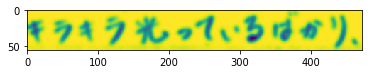

In [164]:
#ガウシアンフィルタによるぼかしを入れた。文字を太くすることが目的である。
#しかしながら、正規分布のパラメータ設定は恣意的なものである。
N = 15
img_blur = cv2.GaussianBlur(img, (N, N), 0)
plt.imshow(img_blur)

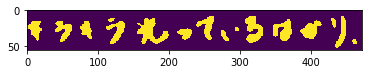

In [165]:
# 画像の２値化に加えて、白黒反転を行っている。
# しきい値には、大津の方法を用いている。
ret2, img_bin = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#show(img_bin)
plt.imshow(img_bin)

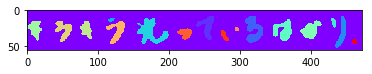

In [166]:
labels = label(img_bin, connectivity=img_bin.ndim)
#show(labels, cmap=plt.cm.rainbow)
plt.imshow(labels, cmap=plt.cm.rainbow)
#除きたい情報の特徴は、重心が画像の縦中心を通っていないこと。
#縦中心: img_bin.shape[0]/2
#サイズが小さいことである。
#とすれば、regionpropsで量を取ってくる必要がある


In [167]:
props = regionprops(labels)
#boxes = np.array([p['BoundingBox'] for p in props if p['Area'] > 100])
#boxes = np.array([p.bbox for p in props if p.area > 100])
#[p.coords for p in props][0][:,0]
center = img_bin.shape[0] / 2
boxes = np.array([p.bbox for p in props if  center in p.coords[:,0]])
#boxes = np.array([p.bbox for p in props if () in p.coords])

In [168]:
print("There are {0:d} charactors." .format(len(boxes)))

There are 13 charactors.


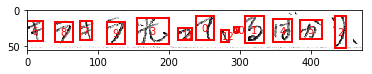

In [169]:
plt.imshow(img, cmap=plt.cm.gray)
#plt.axis('off')
xs = boxes[:,[1,3]].mean(axis=1)
ys = boxes[:,[0,2]].mean(axis=1)
for i, box in enumerate(boxes):
    rect = frame_border(box)
    plt.gca().add_patch(rect)
    plt.text(xs[i]-5, ys[i]+5, str(i),color='red')